In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_data_core.csv')

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop(['id','member_id','url','emp_title'],axis=1,inplace=True)

In [4]:
df['loan_status'] = df.loan_status.apply(lambda loan_stat: 1 if loan_stat == 'Fully Paid' else 0)

df['int_rate'] = df.int_rate.apply(lambda interest: interest[:len(interest)-1])
df['int_rate'] = pd.to_numeric(df['int_rate'])

df['revol_util'].fillna('0%',inplace=True)
df['revol_util'] = df['revol_util'].apply(lambda interest: interest[:len(interest)-1])
df['revol_util'] = pd.to_numeric(df['revol_util'])

In [5]:
numeric=[]

for column in df:
    if ((df[column].dtypes == 'float64') | (df[column].dtypes=='int64')):
        numeric.append(column)

#removed dates and useless stats (columns that contained only 1 value)
numeric.remove('loan_status')
numeric.remove('next_pymnt_d')
numeric.remove('out_prncp')
numeric.remove('out_prncp_inv')
numeric.remove('collections_12_mths_ex_med')
numeric.remove('policy_code')
numeric.remove('acc_now_delinq')
numeric.remove('chargeoff_within_12_mths')
numeric.remove('delinq_amnt')
numeric.remove('num_tl_120dpd_2m')
numeric.remove('num_tl_30dpd')
numeric.remove('deferral_term')
numeric.remove('hardship_length')

objects=[]
for column in df:
    if (df[column].dtypes == 'object'):
        objects.append(column)

#removed dates and useless stats (columns where the feature size was very small)
objects.remove('last_pymnt_d')
objects.remove('last_credit_pull_d')
objects.remove('desc')
objects.remove('title')
objects.remove('zip_code')
objects.remove('addr_state')
objects.remove('earliest_cr_line')
objects.remove('sec_app_earliest_cr_line')
objects.remove('hardship_reason')
objects.remove('hardship_start_date')
objects.remove('hardship_end_date')
objects.remove('payment_plan_start_date')
objects.remove('debt_settlement_flag_date')
objects.remove('settlement_date')
objects.remove('hardship_flag')
objects.remove('hardship_type')
objects.remove('issue_d')
objects.remove('debt_settlement_flag')

In [6]:
def percentage(feature):
    """Prints out number of samples and percent of total"""
    """df is the base and df1 is specific df we are interested in and item is the column we are trying to look at"""

    all_loans = df[feature].value_counts().sort_index()
    bad_loans = df.loc[df.loan_status==0][feature].value_counts().sort_index() / all_loans * 100
    n_percent = pd.concat([all_loans, bad_loans], axis=1)
    n_percent.columns = ['n_samples', 'percent failed']
    n_percent.fillna(0, inplace=True)
    print(n_percent)


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [7]:
def object_graph(feature):
    
    """Makes a graph of a column complete with all it's features and prints out the features with sample size and fail rate"""
    
    feature_interest = df[[feature,'loan_status']].dropna()
    
    x = sorted(list(set(feature_interest[feature])))
    y = [np.sum(feature_interest.loc[feature_interest[feature]==i]['loan_status'])/2507640*100 for i in x]
    plt.bar(x,y)
    
    plt.title(feature.upper())
    plt.ylabel('%')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    
    plt.show()
    print(percentage(feature))

def numeric_graph(feature):
    
    """Makes a graph of a numeric column by turn the data into a ECDF"""
    
    feature_interest = df[[feature,'loan_status']].dropna()
    
    #good loans
    good_x,good_y = ecdf(feature_interest.loc[feature_interest.loan_status == 1][feature])
    plt.plot(good_x,good_y,marker='.',linestyle='none',color='green',label='Fully Paid')
    
    #population
    pop_x,pop_y = ecdf(feature_interest[feature])
    plt.plot(pop_x,pop_y,marker='.',linestyle='none',color='black',label='All loans')
    
    #bad loans
    bad_x,bad_y = ecdf(feature_interest.loc[feature_interest.loan_status == 0][feature])
    plt.plot(bad_x,bad_y,marker='.',linestyle='none',color='red',label='Charged Off')
    
    
    plt.title(feature.upper())
    plt.axis([np.percentile(pop_x,2.5), np.percentile(pop_x,97.5), 0, 1])
    plt.xlabel('Amounts')
    plt.ylabel('% cumulative')
    plt.legend(loc='best')
    
    plt.show()
    
    df_description = pd.concat([feature_interest[feature].describe(),
                                feature_interest.loc[feature_interest.loan_status == 1][feature].describe(),                                
                                feature_interest.loc[feature_interest.loan_status == 0][feature].describe()],
                               axis=1)
    df_description.columns = ['All loans', 'Fully Paid','Charged Off']
    print(df_description)

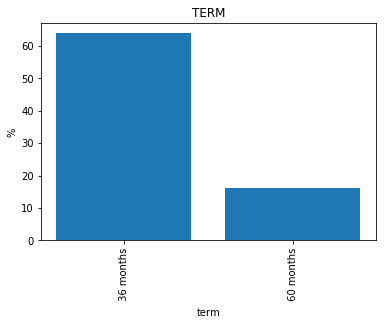

            n_samples  percent failed
 36 months    1904562       15.911480
 60 months     603078       32.346728
None


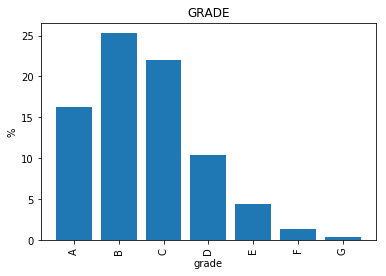

   n_samples  percent failed
A     434114        5.989210
B     731908       13.260137
C     711534       22.216507
D     374050       30.109344
E     177466       38.392706
F      61314       45.046808
G      17254       49.913064
None


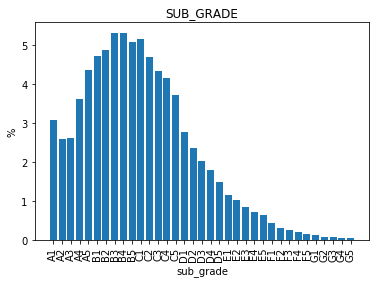

    n_samples  percent failed
A1      79660        3.218679
A2      68442        4.631659
A3      69396        5.481584
A4      97030        6.742245
A5     119586        8.295285
B1     131774       10.266062
B2     137888       11.251160
B3     153242       12.862009
B4     156188       14.705355
B5     152816       16.576798
C1     159434       18.791475
C2     148146       20.579698
C3     140024       22.303319
C4     138548       24.688916
C5     125382       25.676732
D1      96310       27.646143
D2      83326       29.268176
D3      72988       30.172083
D4      66020       32.247804
D5      55406       33.025304
E1      45432       36.084698
E2      40602       37.549874
E3      34722       38.672888
E4      29760       40.080645
E5      26950       41.328386
F1      18972       42.040902
F2      13834       45.294203
F3      11694       44.894818
F4       9324       47.683398
F5       7490       49.158879
G1       5526       48.172277
G2       4114       49.052018
G3       3

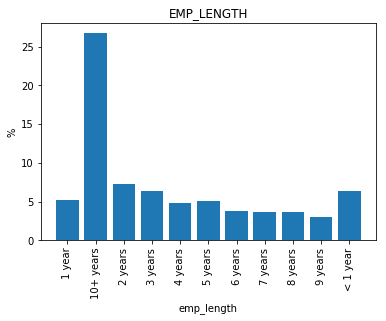

           n_samples  percent failed
1 year        164812       20.469383
10+ years     824588       18.725230
2 years       226758       19.733813
3 years       200576       19.910657
4 years       150192       19.701449
5 years       157126       19.511729
6 years       117608       19.248691
7 years       112658       19.442916
8 years       115110       19.881852
9 years        95802       19.876412
< 1 year      199366       20.336467
None


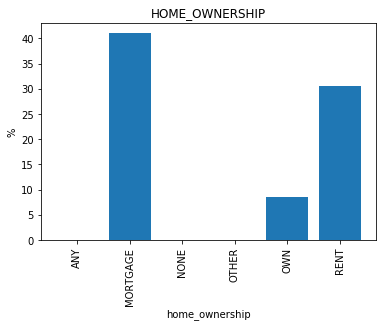

          n_samples  percent failed
ANY             518       19.305019
MORTGAGE    1242936       17.133947
NONE             96       14.583333
OTHER           288       18.750000
OWN          266898       20.517201
RENT         996904       23.094300
None


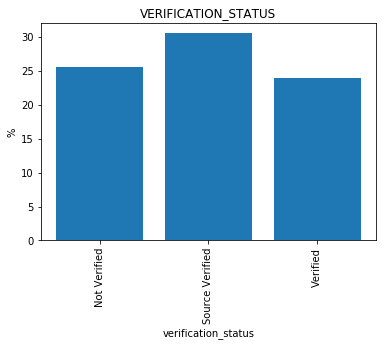

                 n_samples  percent failed
Not Verified        749220       14.468647
Source Verified     969034       20.935282
Verified            789386       23.670042
None


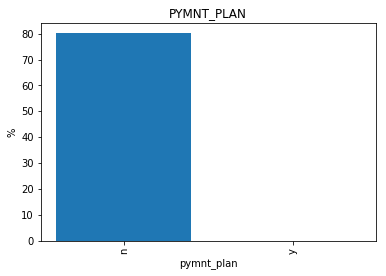

   n_samples  percent failed
n    2507638       19.864111
y          2        0.000000
None


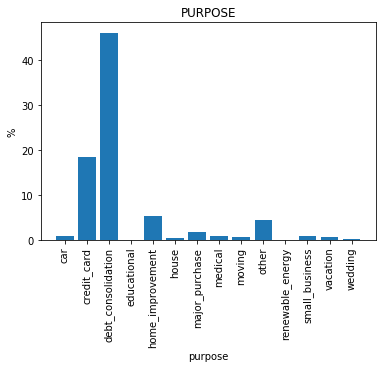

                    n_samples  percent failed
car                     27082       14.400709
credit_card            551450       16.858827
debt_consolidation    1461114       21.066255
educational               652       17.177914
home_improvement       161660       17.622170
house                   12736       21.278266
major_purchase          54082       18.165009
medical                 28352       21.621050
moving                  17616       23.206176
other                  141124       20.924860
renewable_energy         1744       23.279817
small_business          28818       29.308071
vacation                16622       18.998917
wedding                  4588       12.162162
None


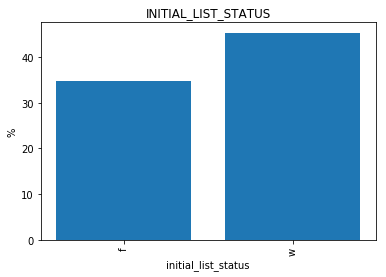

   n_samples  percent failed
f    1084118       19.507471
w    1423522       20.135692
None


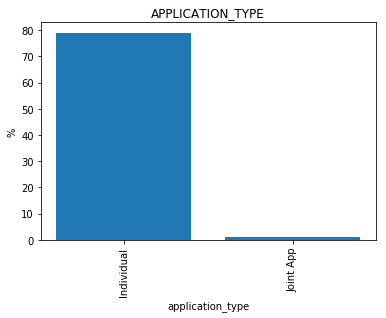

            n_samples  percent failed
Individual    2471086       19.824158
Joint App       36554       22.563878
None


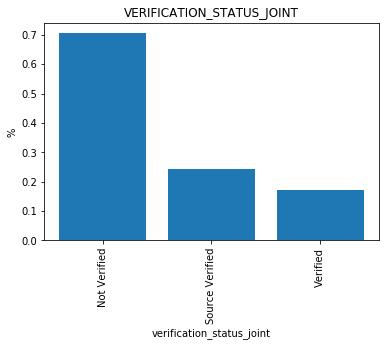

                 n_samples  percent failed
Not Verified         22572       21.664009
Source Verified       7894       23.030149
Verified              5834       25.917038
None


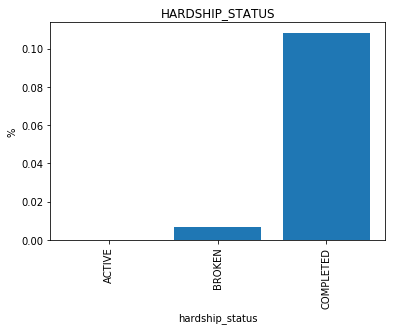

           n_samples  percent failed
ACTIVE             2        0.000000
BROKEN          3564       95.286195
COMPLETED       6462       57.969669
None


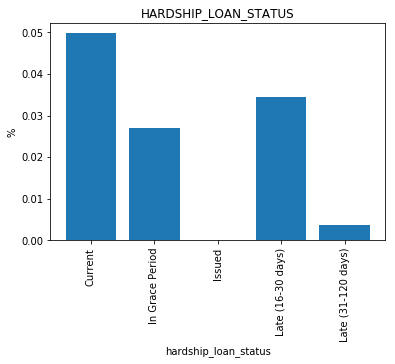

                    n_samples  percent failed
Current                  2510       50.278884
In Grace Period          2610       74.099617
Issued                     10       60.000000
Late (16-30 days)        4502       80.808530
Late (31-120 days)        396       76.262626
None


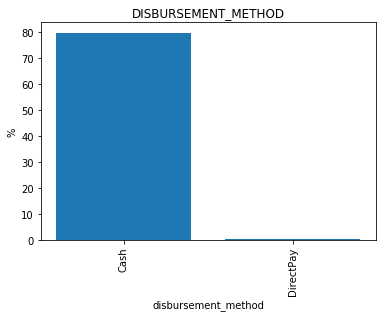

           n_samples  percent failed
Cash         2498216       19.856410
DirectPay       9424       21.901528
None


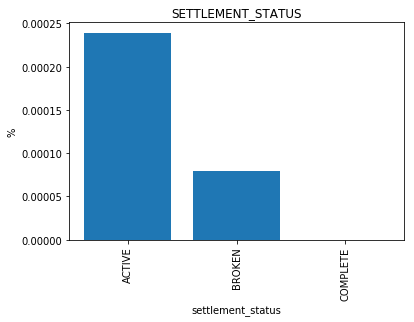

          n_samples  percent failed
ACTIVE        26374       99.977250
BROKEN         9216       99.978299
COMPLETE      25894      100.000000
None


In [8]:
for thing in objects:
    object_graph(thing)

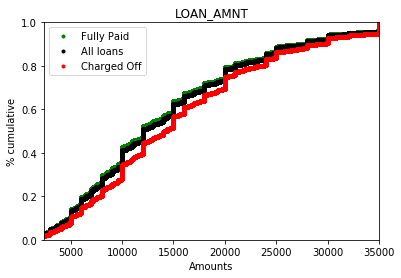

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.441101e+04  1.413918e+04   15507.632097
std    8.663254e+03  8.621673e+03    8743.623101
min    5.000000e+02  5.000000e+02     900.000000
25%    8.000000e+03  7.500000e+03    9000.000000
50%    1.200000e+04  1.200000e+04   14250.000000
75%    2.000000e+04  2.000000e+04   20200.000000
max    4.000000e+04  4.000000e+04   40000.000000


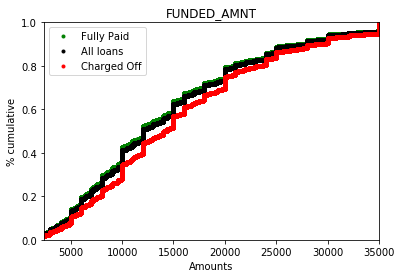

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.440198e+04  1.413005e+04   15499.010479
std    8.658998e+03  8.617311e+03    8739.681715
min    5.000000e+02  5.000000e+02     900.000000
25%    8.000000e+03  7.500000e+03    9000.000000
50%    1.200000e+04  1.200000e+04   14225.000000
75%    2.000000e+04  2.000000e+04   20150.000000
max    4.000000e+04  4.000000e+04   40000.000000


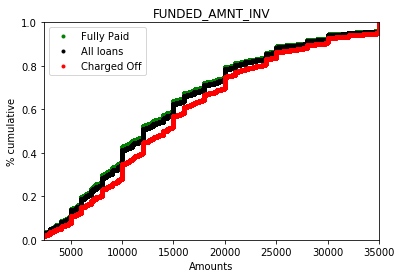

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.437834e+04  1.410735e+04   15471.552311
std    8.661694e+03  8.619821e+03    8743.741887
min    0.000000e+00  0.000000e+00       0.000000
25%    7.950000e+03  7.500000e+03    9000.000000
50%    1.200000e+04  1.200000e+04   14125.000000
75%    2.000000e+04  2.000000e+04   20125.000000
max    4.000000e+04  4.000000e+04   40000.000000


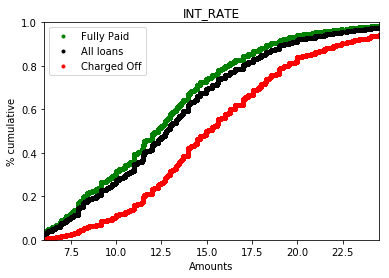

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.324848e+01  1.264211e+01      15.694675
std    4.733669e+00  4.501023e+00       4.858772
min    5.310000e+00  5.310000e+00       5.310000
25%    9.750000e+00  9.170000e+00      12.290000
50%    1.279000e+01  1.229000e+01      15.050000
75%    1.599000e+01  1.531000e+01      18.550000
max    3.099000e+01  3.099000e+01      30.990000


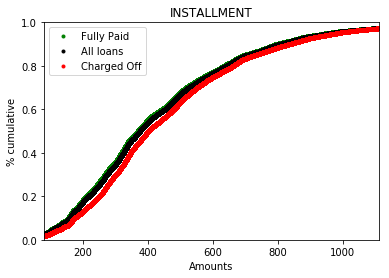

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   4.380954e+02  4.318176e+02     463.421213
std    2.601662e+02  2.596661e+02     260.643363
min    4.930000e+00  4.930000e+00      21.620000
25%    2.495400e+02  2.425400e+02     275.330000
50%    3.754900e+02  3.695000e+02     402.540000
75%    5.799500e+02  5.734025e+02     602.080000
max    1.719830e+03  1.719830e+03    1717.630000


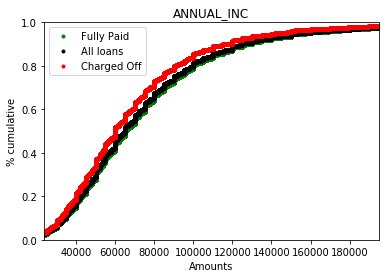

          All loans    Fully Paid   Charged Off
count  2.507640e+06  2.009520e+06  4.981200e+05
mean   7.609940e+04  7.755109e+04  7.024296e+04
std    6.969604e+04  7.058010e+04  6.568454e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    4.594575e+04  4.700000e+04  4.300000e+04
50%    6.500000e+04  6.500000e+04  6.000000e+04
75%    9.000000e+04  9.270000e+04  8.500000e+04
max    1.099920e+07  1.099920e+07  9.500000e+06


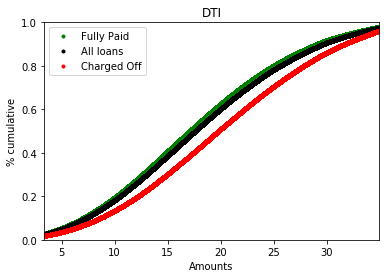

          All loans    Fully Paid    Charged Off
count  2.507172e+06  2.009138e+06  498034.000000
mean   1.822313e+01  1.774991e+01      20.132151
std    1.051788e+01  1.045924e+01      10.537612
min   -1.000000e+00 -1.000000e+00       0.000000
25%    1.181000e+01  1.143000e+01      13.630000
50%    1.761000e+01  1.709000e+01      19.800000
75%    2.401000e+01  2.339000e+01      26.310000
max    9.990000e+02  9.990000e+02     999.000000


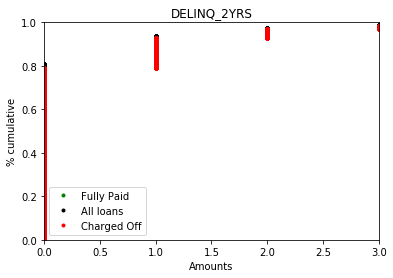

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   3.190338e-01  3.102890e-01       0.354312
std    8.786840e-01  8.619411e-01       0.942393
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    3.900000e+01  3.900000e+01      27.000000


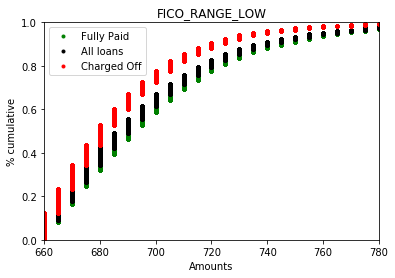

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   6.958590e+02  6.979485e+02     687.429515
std    3.161433e+01  3.260976e+01      25.551707
min    6.250000e+02  6.250000e+02     660.000000
25%    6.700000e+02  6.750000e+02     670.000000
50%    6.900000e+02  6.900000e+02     680.000000
75%    7.100000e+02  7.150000e+02     700.000000
max    8.450000e+02  8.450000e+02     845.000000


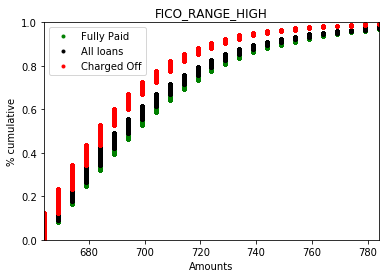

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   6.998591e+02  7.019486e+02     691.429563
std    3.161493e+01  3.261042e+01      25.552005
min    6.290000e+02  6.290000e+02     664.000000
25%    6.740000e+02  6.790000e+02     674.000000
50%    6.940000e+02  6.940000e+02     684.000000
75%    7.140000e+02  7.190000e+02     704.000000
max    8.500000e+02  8.500000e+02     850.000000


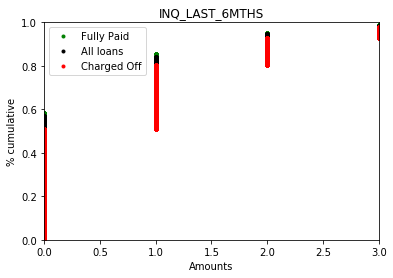

          All loans    Fully Paid    Charged Off
count  2.507638e+06  2.009518e+06  498120.000000
mean   6.620764e-01  6.313355e-01       0.786092
std    9.446772e-01  9.225609e-01       1.019717
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    1.000000e+00  1.000000e+00       1.000000
max    8.000000e+00  8.000000e+00       8.000000


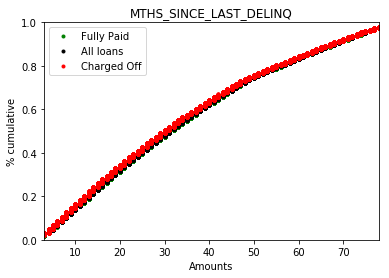

          All loans     Fully Paid    Charged Off
count  1.244114e+06  988054.000000  256060.000000
mean   3.426813e+01      34.410729      33.717879
std    2.192451e+01      21.909145      21.975060
min    0.000000e+00       0.000000       0.000000
25%    1.600000e+01      16.000000      15.000000
50%    3.100000e+01      31.000000      30.000000
75%    5.000000e+01      50.000000      49.000000
max    2.260000e+02     192.000000     226.000000


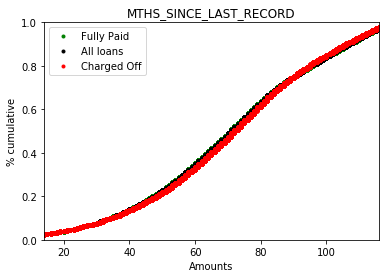

           All loans     Fully Paid   Charged Off
count  426228.000000  329686.000000  96542.000000
mean       70.417044      70.315482     70.763875
std        26.664615      26.738528     26.407839
min         0.000000       0.000000      0.000000
25%        53.000000      52.000000     53.000000
50%        71.000000      71.000000     72.000000
75%        90.000000      90.000000     90.000000
max       129.000000     123.000000    129.000000


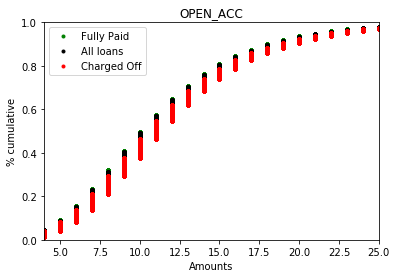

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.159958e+01  1.151659e+01      11.934381
std    5.455954e+00  5.409710e+00       5.626248
min    0.000000e+00  0.000000e+00       0.000000
25%    8.000000e+00  8.000000e+00       8.000000
50%    1.100000e+01  1.100000e+01      11.000000
75%    1.400000e+01  1.400000e+01      15.000000
max    9.000000e+01  9.000000e+01      76.000000


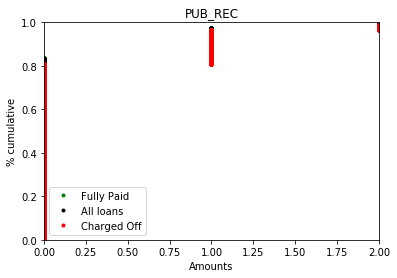

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   2.158827e-01  2.078964e-01       0.248101
std    6.040937e-01  5.892308e-01       0.659687
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    8.600000e+01  6.300000e+01      86.000000


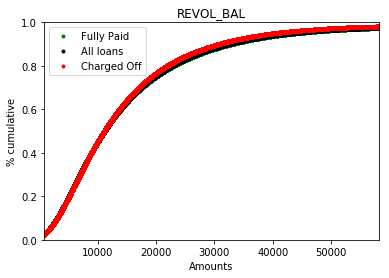

          All loans    Fully Paid   Charged Off
count  2.507640e+06  2.009520e+06  4.981200e+05
mean   1.627865e+04  1.649631e+04  1.540055e+04
std    2.224600e+04  2.299757e+04  1.888771e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    5.997000e+03  5.982000e+03  6.058750e+03
50%    1.119200e+04  1.120500e+04  1.114700e+04
75%    1.981700e+04  1.997800e+04  1.920200e+04
max    2.904836e+06  2.904836e+06  1.746716e+06


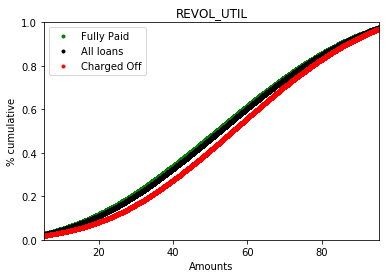

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   5.217030e+01  5.141690e+01      55.209685
std    2.443677e+01  2.455029e+01      23.731766
min    0.000000e+00  0.000000e+00       0.000000
25%    3.400000e+01  3.300000e+01      38.000000
50%    5.260000e+01  5.170000e+01      56.000000
75%    7.100000e+01  7.040000e+01      73.500000
max    8.923000e+02  8.923000e+02     366.600000


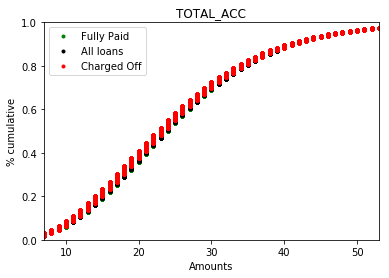

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   2.507237e+01  2.512617e+01      24.855296
std    1.198443e+01  1.195395e+01      12.104191
min    2.000000e+00  2.000000e+00       2.000000
25%    1.600000e+01  1.600000e+01      16.000000
50%    2.300000e+01  2.300000e+01      23.000000
75%    3.200000e+01  3.200000e+01      32.000000
max    1.760000e+02  1.620000e+02     176.000000


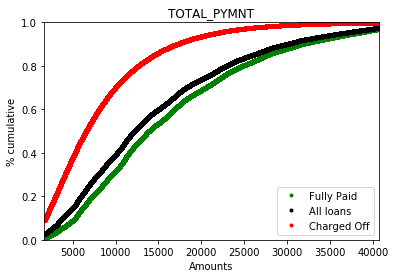

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.485085e+04  1.647172e+04    8311.880318
std    1.031403e+04  1.042185e+04    6633.437691
min    0.000000e+00  5.263322e+02       0.000000
25%    6.896965e+03  8.487580e+03    3555.950000
50%    1.217796e+04  1.388977e+04    6572.815000
75%    2.059952e+04  2.245096e+04   11184.885000
max    6.294899e+04  6.294899e+04   61947.529800


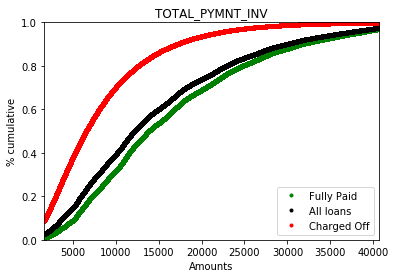

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.482589e+04  1.644419e+04    8297.332482
std    1.031252e+04  1.042252e+04    6630.217524
min    0.000000e+00  0.000000e+00       0.000000
25%    6.878730e+03  8.461420e+03    3543.937500
50%    1.215451e+04  1.386224e+04    6559.390000
75%    2.057078e+04  2.242996e+04   11167.587500
max    6.290403e+04  6.290403e+04   61947.530000


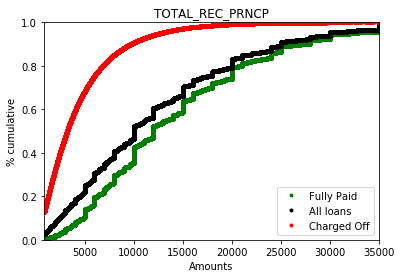

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   1.219976e+04  1.413005e+04    4412.568982
std    8.825014e+03  8.617311e+03    4101.735149
min    0.000000e+00  5.000000e+02       0.000000
25%    5.093792e+03  7.500000e+03    1559.235000
50%    1.000000e+04  1.200000e+04    3204.720000
75%    1.737500e+04  2.000000e+04    5928.712500
max    4.000000e+04  4.000000e+04   37600.000000


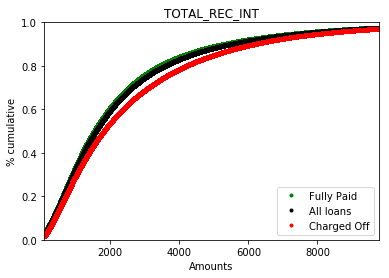

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   2.413194e+03  2.340877e+03    2704.937532
std    2.599078e+03  2.561764e+03    2725.048139
min    0.000000e+00  0.000000e+00       0.000000
25%    7.808475e+02  7.614400e+02     868.987500
50%    1.587870e+03  1.539510e+03    1819.455000
75%    3.048460e+03  2.923390e+03    3597.980000
max    2.794899e+04  2.794899e+04   26822.380000


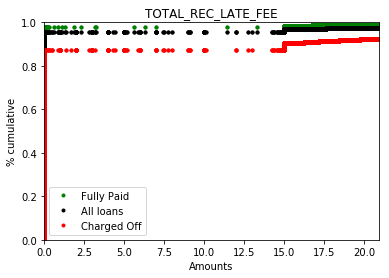

          All loans    Fully Paid   Charged Off
count  2.507640e+06  2.009520e+06  4.981200e+05
mean   1.523248e+00  7.969781e-01  4.453174e+00
std    1.041176e+01  8.221701e+00  1.619636e+01
min   -5.100000e-09  0.000000e+00 -5.100000e-09
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00
max    1.188830e+03  1.188830e+03  8.741700e+02


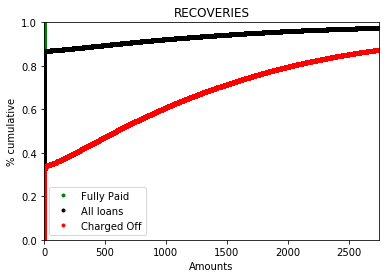

          All loans  Fully Paid    Charged Off
count  2.507640e+06   2009520.0  498120.000000
mean   2.363670e+02         0.0    1189.920628
std    9.371463e+02         0.0    1812.901307
min    0.000000e+00         0.0       0.000000
25%    0.000000e+00         0.0       0.000000
50%    0.000000e+00         0.0     594.485000
75%    0.000000e+00         0.0    1700.620000
max    3.985955e+04         0.0   39859.550000


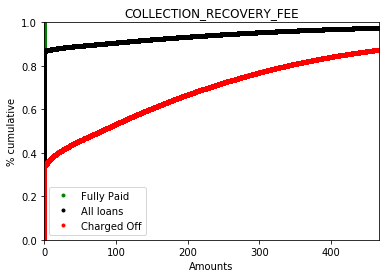

          All loans  Fully Paid    Charged Off
count  2.507640e+06   2009520.0  498120.000000
mean   3.920173e+01         0.0     197.349699
std    1.639968e+02         0.0     322.776125
min    0.000000e+00         0.0       0.000000
25%    0.000000e+00         0.0       0.000000
50%    0.000000e+00         0.0      79.033500
75%    0.000000e+00         0.0     278.808300
max    7.174719e+03         0.0    7174.719000


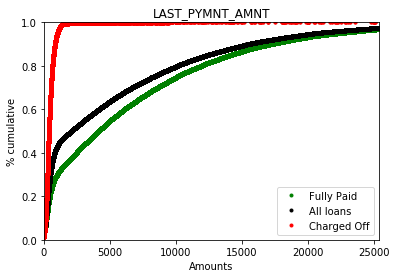

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   5.424672e+03  6.652606e+03     470.928778
std    7.081722e+03  7.410268e+03     566.015907
min    0.000000e+00  0.000000e+00       0.000000
25%    4.001700e+02  6.546600e+02     256.037500
50%    2.088640e+03  4.146090e+03     389.865000
75%    8.271613e+03  1.005805e+04     596.820000
max    4.219205e+04  4.219205e+04   37600.000000


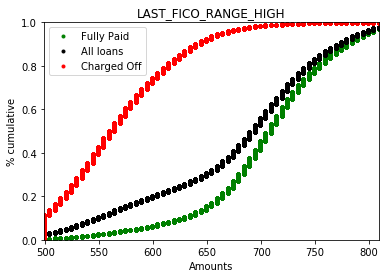

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   6.770336e+02  7.039450e+02     568.467385
std    8.099676e+01  6.184022e+01      53.766440
min    0.000000e+00  0.000000e+00       0.000000
25%    6.290000e+02  6.740000e+02     524.000000
50%    6.940000e+02  7.090000e+02     559.000000
75%    7.340000e+02  7.440000e+02     604.000000
max    8.500000e+02  8.500000e+02     850.000000


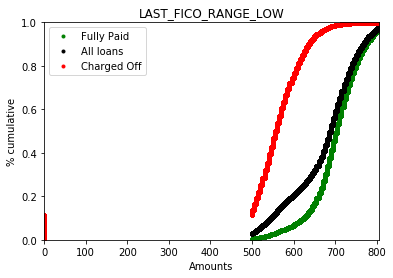

          All loans    Fully Paid    Charged Off
count  2.507640e+06  2.009520e+06  498120.000000
mean   6.602392e+02  6.978789e+02     508.393178
std    1.314728e+02  7.542508e+01     187.866347
min    0.000000e+00  0.000000e+00       0.000000
25%    6.250000e+02  6.700000e+02     520.000000
50%    6.900000e+02  7.050000e+02     555.000000
75%    7.300000e+02  7.400000e+02     600.000000
max    8.450000e+02  8.450000e+02     845.000000


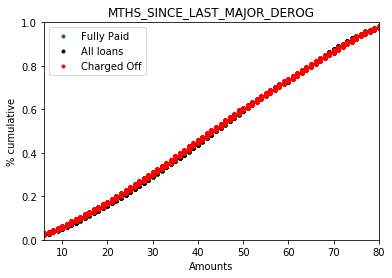

           All loans     Fully Paid    Charged Off
count  658410.000000  514742.000000  143668.000000
mean       43.647572      43.715143      43.405477
std        21.359458      21.305850      21.548767
min         0.000000       0.000000       0.000000
25%        27.000000      27.000000      26.000000
50%        44.000000      44.000000      43.000000
75%        61.000000      61.000000      61.000000
max       226.000000     192.000000     226.000000


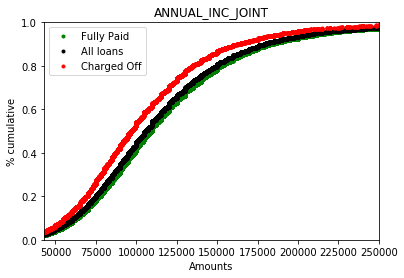

          All loans    Fully Paid    Charged Off
count  3.655400e+04  2.830600e+04    8248.000000
mean   1.163916e+05  1.194707e+05  105824.905601
std    5.704025e+04  5.861326e+04   49853.581894
min    1.100000e+04  1.100000e+04   15850.000000
25%    8.000000e+04  8.300000e+04   74000.000000
50%    1.060000e+05  1.092000e+05   97000.000000
75%    1.400000e+05  1.430000e+05  127000.000000
max    1.350000e+06  1.350000e+06  650000.000000


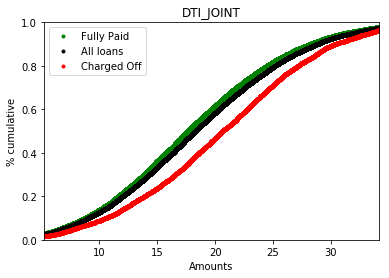

          All loans    Fully Paid  Charged Off
count  36552.000000  28304.000000  8248.000000
mean      18.686105     18.113038    20.652650
std        7.573205      7.441006     7.692684
min        0.000000      0.000000     0.770000
25%       13.217500     12.770000    15.340000
50%       18.265000     17.590000    20.600000
75%       23.832500     23.070000    25.830000
max       69.490000     61.900000    69.490000


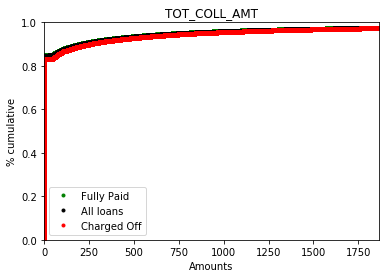

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   2.495436e+02  2.525724e+02     237.522505
std    1.146587e+04  1.279908e+04    1752.307548
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    9.152545e+06  9.152545e+06  146917.000000


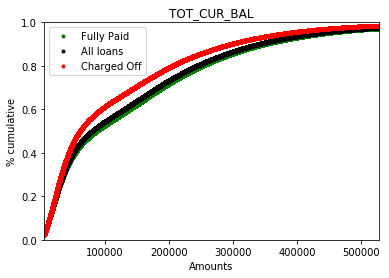

          All loans    Fully Paid   Charged Off
count  2.372586e+06  1.895102e+06  4.774840e+05
mean   1.409872e+05  1.466147e+05  1.186522e+05
std    1.570073e+05  1.618400e+05  1.338320e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.954400e+04  3.013100e+04  2.766300e+04
50%    8.044100e+04  8.761500e+04  6.152200e+04
75%    2.104650e+05  2.190310e+05  1.746030e+05
max    8.000078e+06  8.000078e+06  3.437283e+06


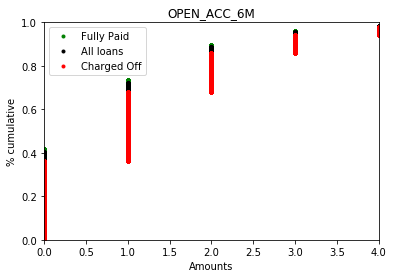

           All loans     Fully Paid    Charged Off
count  902852.000000  699332.000000  203520.000000
mean        1.058065       1.018272       1.194801
std         1.214448       1.184869       1.301775
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.000000       1.000000       1.000000
75%         2.000000       2.000000       2.000000
max        18.000000      16.000000      18.000000


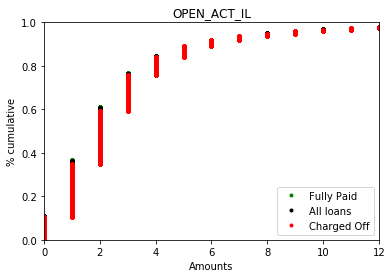

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        2.810523       2.793346       2.869546
std         3.004407       2.984549       3.070941
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         2.000000       2.000000       2.000000
75%         3.000000       3.000000       3.000000
max        57.000000      53.000000      57.000000


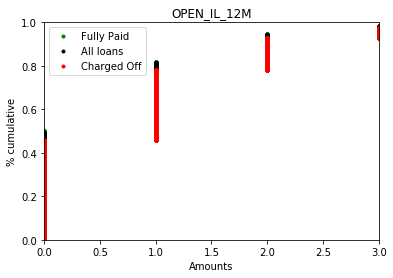

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        0.785077       0.760913       0.868111
std         0.998134       0.979500       1.055466
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.000000       0.000000       1.000000
75%         1.000000       1.000000       1.000000
max        25.000000      20.000000      25.000000


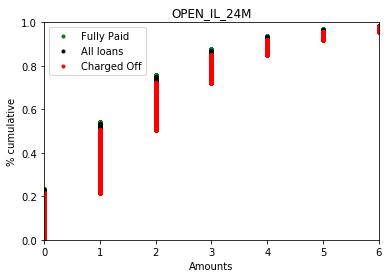

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        1.759733       1.722084       1.889102
std         1.693012       1.661985       1.789522
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       1.000000       1.000000
75%         3.000000       2.000000       3.000000
max        51.000000      30.000000      51.000000


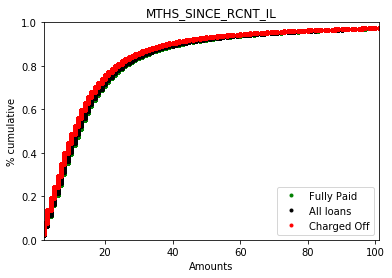

           All loans     Fully Paid    Charged Off
count  879998.000000  682496.000000  197502.000000
mean       19.407771      19.706299      18.376168
std        24.603680      24.562077      24.719228
min         0.000000       0.000000       0.000000
25%         6.000000       6.000000       6.000000
50%        12.000000      12.000000      11.000000
75%        22.000000      22.000000      20.000000
max       511.000000     488.000000     511.000000


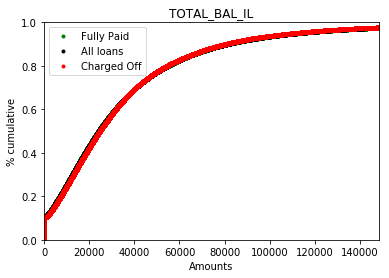

          All loans    Fully Paid    Charged Off
count  9.028540e+05  6.993340e+05  203520.000000
mean   3.606312e+04  3.610227e+04   35928.570666
std    4.288981e+04  4.333407e+04   41326.679780
min    0.000000e+00  0.000000e+00       0.000000
25%    9.859000e+03  9.721000e+03   10326.750000
50%    2.432900e+04  2.418500e+04   24779.500000
75%    4.695300e+04  4.700275e+04   46765.250000
max    1.711009e+06  1.711009e+06  796104.000000


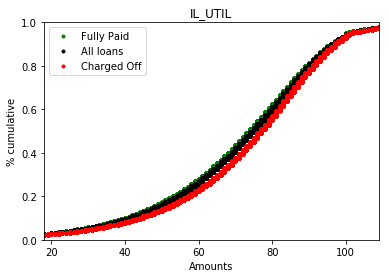

           All loans     Fully Paid   Charged Off
count  783574.000000  604830.000000  178744.00000
mean       71.670004      71.067794      73.70775
std        22.775452      22.821431      22.50001
min         0.000000       0.000000       0.00000
25%        59.000000      58.000000      62.00000
50%        75.000000      74.000000      77.00000
75%        87.000000      87.000000      89.00000
max       558.000000     464.000000     558.00000


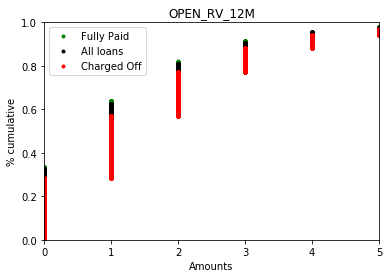

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        1.436106       1.381783       1.622769
std         1.582616       1.544811       1.692919
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.000000       1.000000       1.000000
75%         2.000000       2.000000       2.000000
max        28.000000      28.000000      26.000000


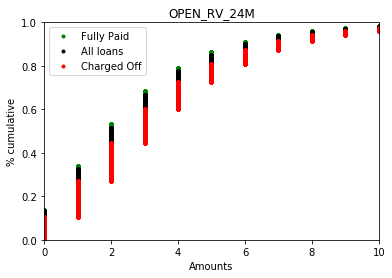

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        3.036376       2.914713       3.454432
std         2.714445       2.639579       2.918897
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         2.000000       2.000000       3.000000
75%         4.000000       4.000000       5.000000
max        53.000000      53.000000      49.000000


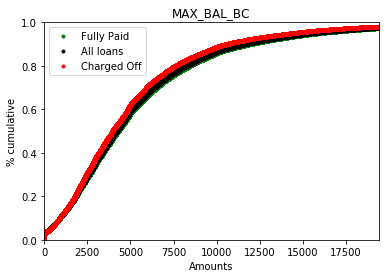

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean     5549.137739    5659.644951    5169.413630
std      5490.696393    5662.023826    4836.936491
min         0.000000       0.000000       0.000000
25%      2203.000000    2235.000000    2102.000000
50%      4217.000000    4297.000000    3962.000000
75%      7203.000000    7369.000000    6688.250000
max    776843.000000  776843.000000  208872.000000


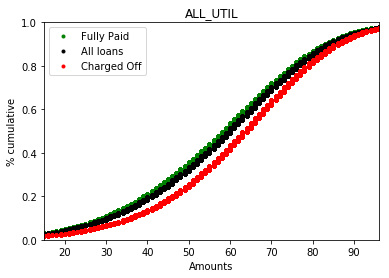

           All loans     Fully Paid    Charged Off
count  902774.000000  699264.000000  203510.000000
mean       58.539736      57.456637      62.261284
std        20.814758      20.957823      19.870608
min         0.000000       0.000000       0.000000
25%        45.000000      43.000000      50.000000
50%        60.000000      59.000000      64.000000
75%        73.000000      72.000000      76.000000
max       198.000000     198.000000     184.000000


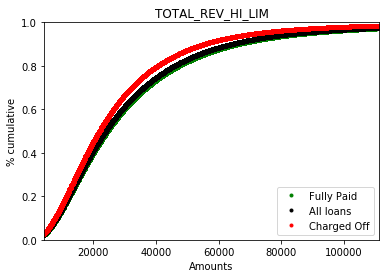

          All loans    Fully Paid   Charged Off
count  2.372586e+06  1.895102e+06  4.774840e+05
mean   3.260832e+04  3.357595e+04  2.876786e+04
std    3.667124e+04  3.853346e+04  2.775743e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.400000e+04  1.430000e+04  1.300000e+04
50%    2.400000e+04  2.450000e+04  2.200000e+04
75%    4.040000e+04  4.160000e+04  3.590000e+04
max    9.999999e+06  9.999999e+06  1.998700e+06


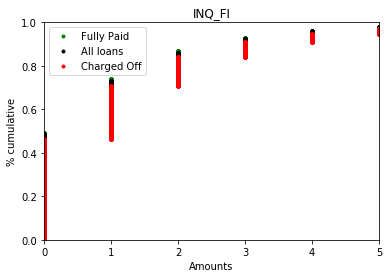

           All loans     Fully Paid    Charged Off
count  902854.000000  699334.000000  203520.000000
mean        1.094476       1.061724       1.207017
std         1.591920       1.552212       1.716648
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.000000       1.000000       1.000000
75%         2.000000       2.000000       2.000000
max        48.000000      48.000000      28.000000


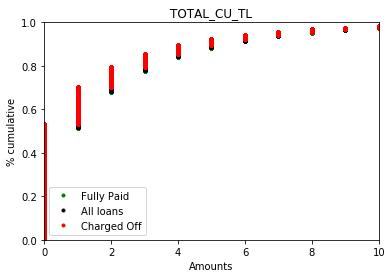

           All loans     Fully Paid    Charged Off
count  902852.000000  699332.000000  203520.000000
mean        1.627020       1.651227       1.543838
std         2.840274       2.857130       2.779979
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         2.000000       2.000000       2.000000
max        79.000000      79.000000      54.000000


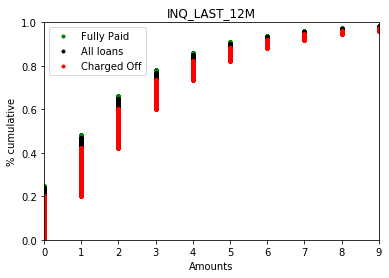

           All loans     Fully Paid    Charged Off
count  902852.000000  699332.000000  203520.000000
mean        2.337070       2.256267       2.614721
std         2.560217       2.495080       2.754400
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         2.000000       2.000000       2.000000
75%         3.000000       3.000000       4.000000
max        67.000000      67.000000      40.000000


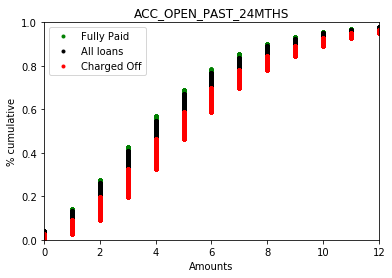

          All loans    Fully Paid    Charged Off
count  2.413078e+06  1.928730e+06  484348.000000
mean   4.688353e+00  4.525386e+00       5.337307
std    3.178227e+00  3.095034e+00       3.413576
min    0.000000e+00  0.000000e+00       0.000000
25%    2.000000e+00  2.000000e+00       3.000000
50%    4.000000e+00  4.000000e+00       5.000000
75%    6.000000e+00  6.000000e+00       7.000000
max    6.400000e+01  5.400000e+01      64.000000


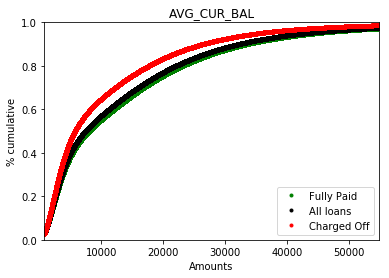

          All loans    Fully Paid    Charged Off
count  2.372550e+06  1.895076e+06  477474.000000
mean   1.346558e+04  1.411700e+04   10880.096499
std    1.620906e+04  1.684071e+04   13096.143537
min    0.000000e+00  0.000000e+00       0.000000
25%    3.107000e+03  3.201000e+03    2808.000000
50%    7.417000e+03  8.026500e+03    5752.000000
75%    1.870075e+04  1.969500e+04   14700.000000
max    9.580840e+05  9.580840e+05  355824.000000


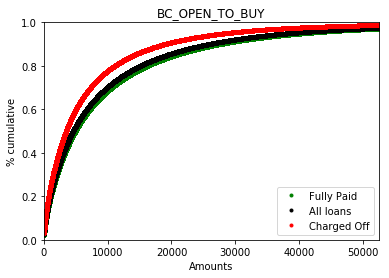

          All loans    Fully Paid    Charged Off
count  2.387790e+06  1.908718e+06  479072.000000
mean   9.996360e+03  1.062796e+04    7479.931543
std    1.513031e+04  1.581189e+04   11703.882695
min    0.000000e+00  0.000000e+00       0.000000
25%    1.423000e+03  1.537250e+03    1061.000000
50%    4.588000e+03  4.940000e+03    3480.000000
75%    1.210900e+04  1.301700e+04    8911.250000
max    5.599120e+05  5.599120e+05  293031.000000


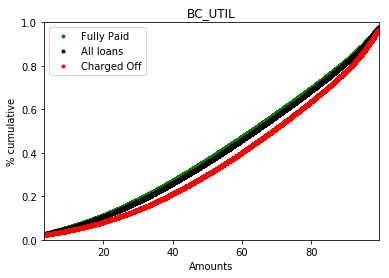

          All loans    Fully Paid    Charged Off
count  2.386342e+06  1.907586e+06  478756.000000
mean   6.044169e+01  5.947751e+01      64.283428
std    2.812853e+01  2.823074e+01      27.382505
min    0.000000e+00  0.000000e+00       0.000000
25%    3.900000e+01  3.780000e+01      44.600000
50%    6.380000e+01  6.250000e+01      68.800000
75%    8.510000e+01  8.430000e+01      88.300000
max    3.396000e+02  3.396000e+02     255.200000


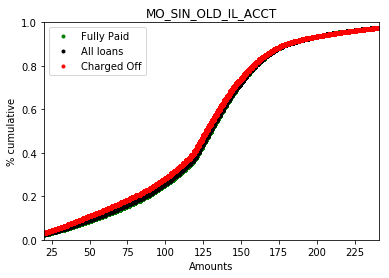

          All loans    Fully Paid    Charged Off
count  2.302254e+06  1.839598e+06  462656.000000
mean   1.259644e+02  1.266374e+02     123.288556
std    5.210205e+01  5.156621e+01      54.097547
min    0.000000e+00  0.000000e+00       0.000000
25%    9.800000e+01  9.900000e+01      93.000000
50%    1.290000e+02  1.300000e+02     127.000000
75%    1.520000e+02  1.530000e+02     151.000000
max    9.990000e+02  9.990000e+02     720.000000


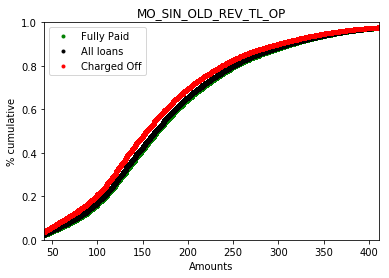

          All loans    Fully Paid    Charged Off
count  2.372584e+06  1.895102e+06  477482.000000
mean   1.816926e+02  1.841002e+02     172.136809
std    9.415688e+01  9.397449e+01      94.273031
min    2.000000e+00  2.000000e+00       2.000000
25%    1.170000e+02  1.200000e+02     110.000000
50%    1.640000e+02  1.670000e+02     154.000000
75%    2.300000e+02  2.330000e+02     218.000000
max    8.510000e+02  8.510000e+02     842.000000


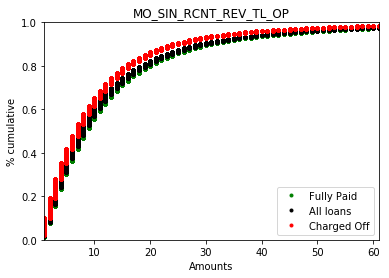

          All loans    Fully Paid    Charged Off
count  2.372584e+06  1.895102e+06  477482.000000
mean   1.306656e+01  1.351944e+01      11.269128
std    1.624667e+01  1.665889e+01      14.355228
min    0.000000e+00  0.000000e+00       0.000000
25%    4.000000e+00  4.000000e+00       3.000000
50%    8.000000e+00  8.000000e+00       7.000000
75%    1.600000e+01  1.600000e+01      14.000000
max    4.380000e+02  4.380000e+02     372.000000


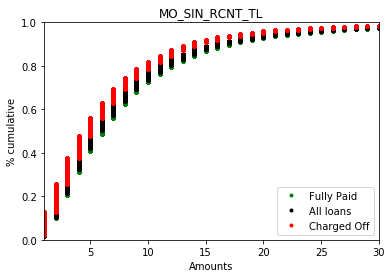

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   7.849721e+00  8.100625e+00       6.853901
std    8.706316e+00  8.901067e+00       7.806976
min    0.000000e+00  0.000000e+00       0.000000
25%    3.000000e+00  3.000000e+00       2.000000
50%    5.000000e+00  6.000000e+00       5.000000
75%    1.000000e+01  1.000000e+01       9.000000
max    3.140000e+02  3.140000e+02     289.000000


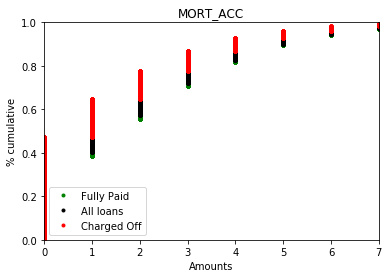

          All loans    Fully Paid    Charged Off
count  2.413078e+06  1.928730e+06  484348.000000
mean   1.685370e+00  1.760621e+00       1.385714
std    2.012596e+00  2.047229e+00       1.838019
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    1.000000e+00  1.000000e+00       1.000000
75%    3.000000e+00  3.000000e+00       2.000000
max    5.100000e+01  5.100000e+01      29.000000


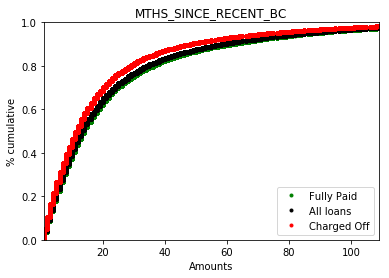

          All loans    Fully Paid    Charged Off
count  2.389502e+06  1.910066e+06  479436.000000
mean   2.379957e+01  2.460975e+01      20.571805
std    3.060687e+01  3.126781e+01      27.583014
min    0.000000e+00  0.000000e+00       0.000000
25%    6.000000e+00  6.000000e+00       5.000000
50%    1.300000e+01  1.400000e+01      12.000000
75%    2.800000e+01  3.000000e+01      24.000000
max    6.390000e+02  6.390000e+02     611.000000


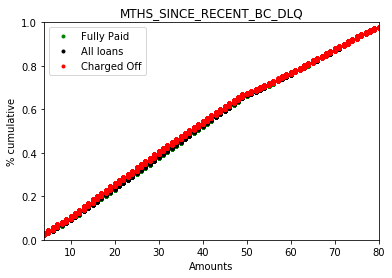

           All loans     Fully Paid    Charged Off
count  596230.000000  471434.000000  124796.000000
mean       39.696932      39.827755      39.202731
std        22.717589      22.666285      22.903708
min         0.000000       0.000000       0.000000
25%        21.000000      21.000000      20.000000
50%        38.000000      38.000000      37.000000
75%        59.000000      59.000000      58.000000
max       189.000000     189.000000     170.000000


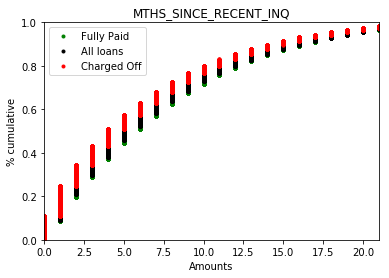

          All loans    Fully Paid    Charged Off
count  2.178022e+06  1.728400e+06  449622.000000
mean   6.709784e+00  6.877605e+00       6.064663
std    5.851616e+00  5.897210e+00       5.626532
min    0.000000e+00  0.000000e+00       0.000000
25%    2.000000e+00  2.000000e+00       2.000000
50%    5.000000e+00  5.000000e+00       4.000000
75%    1.000000e+01  1.000000e+01       9.000000
max    2.500000e+01  2.500000e+01      25.000000


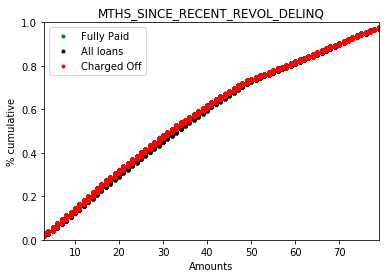

           All loans     Fully Paid    Charged Off
count  840150.000000  666938.000000  173212.000000
mean       35.804230      35.946757      35.255444
std        22.445003      22.423377      22.519725
min         0.000000       0.000000       0.000000
25%        17.000000      17.000000      16.000000
50%        33.000000      33.000000      32.000000
75%        52.000000      52.000000      52.000000
max       197.000000     197.000000     180.000000


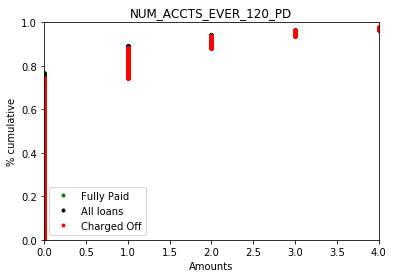

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   5.094880e-01  5.024500e-01       0.537421
std    1.321659e+00  1.316326e+00       1.342253
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       1.000000
max    5.100000e+01  5.100000e+01      34.000000


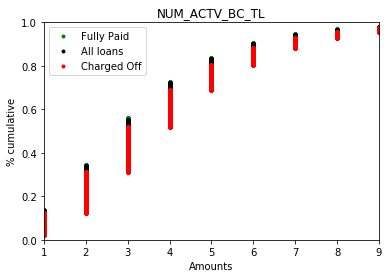

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   3.650632e+00  3.603211e+00       3.838843
std    2.241497e+00  2.208431e+00       2.358803
min    0.000000e+00  0.000000e+00       0.000000
25%    2.000000e+00  2.000000e+00       2.000000
50%    3.000000e+00  3.000000e+00       3.000000
75%    5.000000e+00  5.000000e+00       5.000000
max    3.500000e+01  3.500000e+01      30.000000


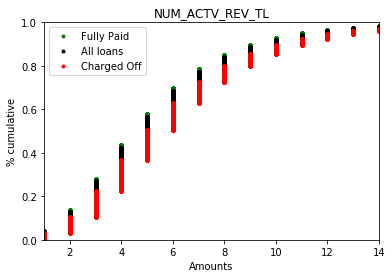

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   5.662781e+00  5.542779e+00       6.139058
std    3.293362e+00  3.218048e+00       3.536755
min    0.000000e+00  0.000000e+00       0.000000
25%    3.000000e+00  3.000000e+00       4.000000
50%    5.000000e+00  5.000000e+00       5.000000
75%    7.000000e+00  7.000000e+00       8.000000
max    6.300000e+01  6.300000e+01      47.000000


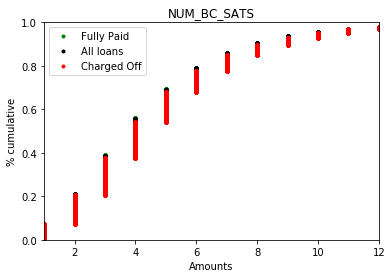

          All loans    Fully Paid    Charged Off
count  2.395958e+06  1.914366e+06  481592.000000
mean   4.732535e+00  4.711289e+00       4.816990
std    2.938490e+00  2.920538e+00       3.007312
min    0.000000e+00  0.000000e+00       0.000000
25%    3.000000e+00  3.000000e+00       3.000000
50%    4.000000e+00  4.000000e+00       4.000000
75%    6.000000e+00  6.000000e+00       6.000000
max    6.300000e+01  6.300000e+01      44.000000


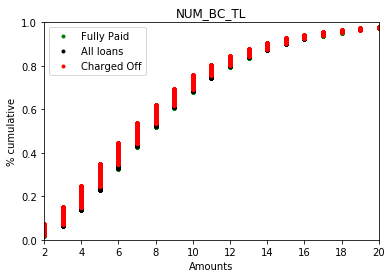

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   8.155501e+00  8.195917e+00       7.995095
std    4.811194e+00  4.815596e+00       4.790325
min    0.000000e+00  0.000000e+00       0.000000
25%    5.000000e+00  5.000000e+00       5.000000
50%    7.000000e+00  7.000000e+00       7.000000
75%    1.100000e+01  1.100000e+01      10.000000
max    7.000000e+01  7.000000e+01      57.000000


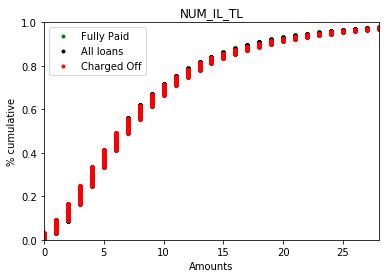

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   8.575470e+00  8.544174e+00       8.699680
std    7.378384e+00  7.308073e+00       7.649823
min    0.000000e+00  0.000000e+00       0.000000
25%    4.000000e+00  4.000000e+00       4.000000
50%    7.000000e+00  7.000000e+00       7.000000
75%    1.100000e+01  1.100000e+01      12.000000
max    1.500000e+02  1.500000e+02     128.000000


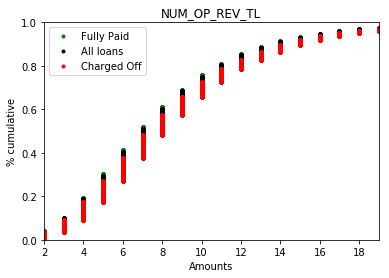

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   8.290561e+00  8.211287e+00       8.605197
std    4.542967e+00  4.501332e+00       4.691396
min    0.000000e+00  0.000000e+00       0.000000
25%    5.000000e+00  5.000000e+00       5.000000
50%    7.000000e+00  7.000000e+00       8.000000
75%    1.000000e+01  1.000000e+01      11.000000
max    8.300000e+01  8.300000e+01      72.000000


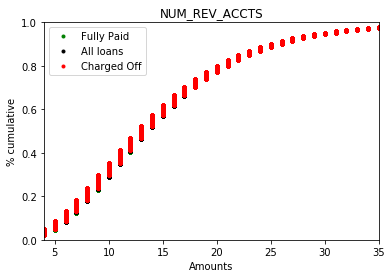

          All loans    Fully Paid    Charged Off
count  2.372584e+06  1.895100e+06  477484.000000
mean   1.469201e+01  1.470639e+01      14.634966
std    8.123022e+00  8.110228e+00       8.173361
min    0.000000e+00  1.000000e+00       0.000000
25%    9.000000e+00  9.000000e+00       9.000000
50%    1.300000e+01  1.300000e+01      13.000000
75%    1.900000e+01  1.900000e+01      19.000000
max    1.280000e+02  1.280000e+02     101.000000


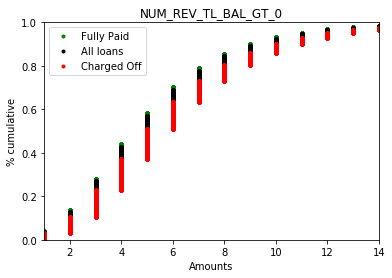

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   5.613787e+00  5.498290e+00       6.072187
std    3.210057e+00  3.139009e+00       3.439732
min    0.000000e+00  0.000000e+00       0.000000
25%    3.000000e+00  3.000000e+00       4.000000
50%    5.000000e+00  5.000000e+00       5.000000
75%    7.000000e+00  7.000000e+00       8.000000
max    4.500000e+01  4.500000e+01      44.000000


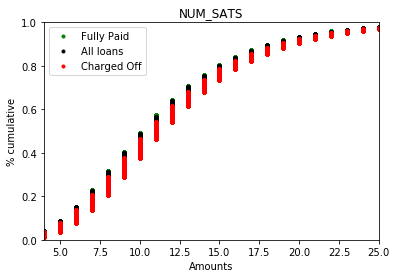

          All loans    Fully Paid    Charged Off
count  2.395958e+06  1.914366e+06  481592.000000
mean   1.165207e+01  1.157179e+01      11.971196
std    5.465617e+00  5.422393e+00       5.622844
min    0.000000e+00  0.000000e+00       0.000000
25%    8.000000e+00  8.000000e+00       8.000000
50%    1.100000e+01  1.100000e+01      11.000000
75%    1.400000e+01  1.400000e+01      15.000000
max    9.000000e+01  9.000000e+01      76.000000


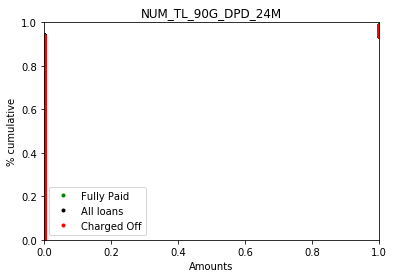

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   8.935314e-02  8.684915e-02       0.099291
std    5.035921e-01  4.978564e-01       0.525623
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    3.900000e+01  3.900000e+01      26.000000


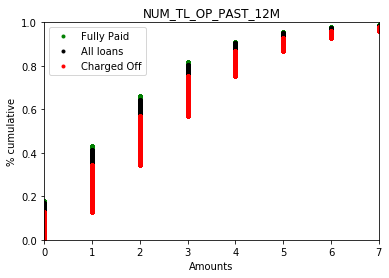

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   2.177679e+00  2.096627e+00       2.499368
std    1.839439e+00  1.794184e+00       1.976523
min    0.000000e+00  0.000000e+00       0.000000
25%    1.000000e+00  1.000000e+00       1.000000
50%    2.000000e+00  2.000000e+00       2.000000
75%    3.000000e+00  3.000000e+00       3.000000
max    3.200000e+01  3.000000e+01      32.000000


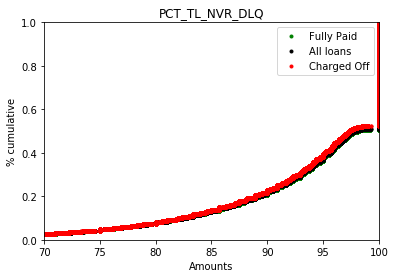

          All loans    Fully Paid    Charged Off
count  2.372278e+06  1.894838e+06  477440.000000
mean   9.417116e+01  9.421456e+01      93.998945
std    8.709222e+00  8.695504e+00       8.761343
min    0.000000e+00  0.000000e+00      10.500000
25%    9.130000e+01  9.140000e+01      90.900000
50%    9.790000e+01  9.800000e+01      97.400000
75%    1.000000e+02  1.000000e+02     100.000000
max    1.000000e+02  1.000000e+02     100.000000


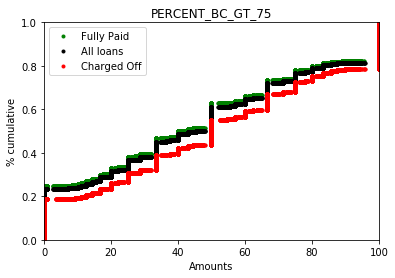

          All loans    Fully Paid    Charged Off
count  2.386984e+06  1.908058e+06  478926.000000
mean   4.572829e+01  4.446895e+01      50.745542
std    3.593945e+01  3.589976e+01      35.658311
min    0.000000e+00  0.000000e+00       0.000000
25%    1.250000e+01  8.300000e+00      20.000000
50%    5.000000e+01  4.000000e+01      50.000000
75%    7.500000e+01  7.500000e+01      80.000000
max    1.000000e+02  1.000000e+02     100.000000


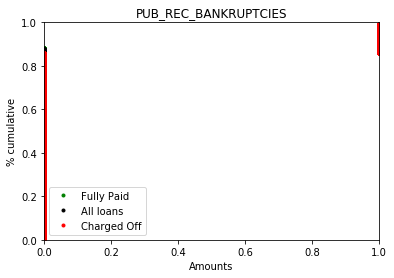

          All loans    Fully Paid    Charged Off
count  2.506246e+06  2.008362e+06  497884.000000
mean   1.340387e-01  1.293243e-01       0.153056
std    3.783036e-01  3.711287e-01       0.405405
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    1.200000e+01  1.200000e+01      11.000000


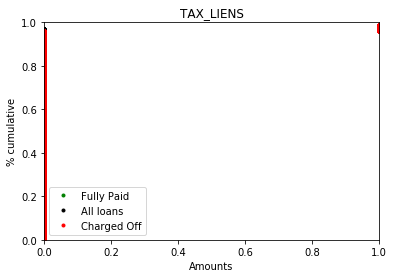

          All loans    Fully Paid    Charged Off
count  2.507562e+06  2.009444e+06  498118.000000
mean   5.229302e-02  5.029053e-02       0.060371
std    3.989664e-01  3.851293e-01       0.450401
min    0.000000e+00  0.000000e+00       0.000000
25%    0.000000e+00  0.000000e+00       0.000000
50%    0.000000e+00  0.000000e+00       0.000000
75%    0.000000e+00  0.000000e+00       0.000000
max    8.500000e+01  6.300000e+01      85.000000


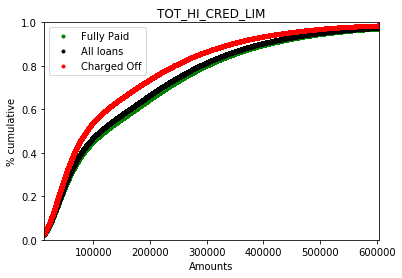

          All loans    Fully Paid   Charged Off
count  2.372586e+06  1.895102e+06  4.774840e+05
mean   1.739312e+05  1.809343e+05  1.461361e+05
std    1.771815e+05  1.825393e+05  1.509192e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    4.955000e+04  5.101200e+04  4.479100e+04
50%    1.123000e+05  1.208150e+05  8.800000e+04
75%    2.515330e+05  2.618410e+05  2.076100e+05
max    9.999999e+06  9.999999e+06  9.999999e+06


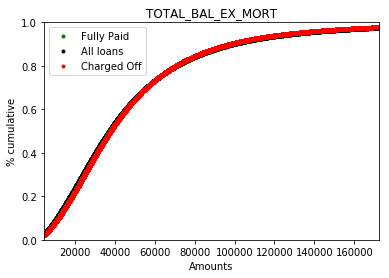

          All loans    Fully Paid   Charged Off
count  2.413078e+06  1.928730e+06  4.843480e+05
mean   4.957939e+04  4.964393e+04  4.932238e+04
std    4.754079e+04  4.825293e+04  4.459140e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.094800e+04  2.073900e+04  2.179600e+04
50%    3.729700e+04  3.713300e+04  3.792100e+04
75%    6.240800e+04  6.242600e+04  6.235000e+04
max    3.408095e+06  3.408095e+06  1.896461e+06


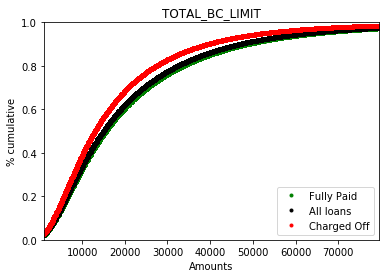

          All loans    Fully Paid    Charged Off
count  2.413078e+06  1.928730e+06  484348.000000
mean   2.147833e+04  2.225887e+04   18370.093941
std    2.138888e+04  2.204602e+04   18213.620496
min    0.000000e+00  0.000000e+00       0.000000
25%    7.700000e+03  8.000000e+03    6800.000000
50%    1.500000e+04  1.550000e+04   13000.000000
75%    2.790000e+04  2.900000e+04   23700.000000
max    1.105500e+06  1.105500e+06  560800.000000


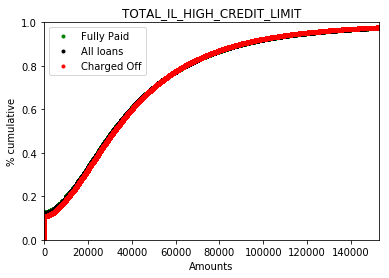

          All loans    Fully Paid    Charged Off
count  2.372586e+06  1.895102e+06  477484.000000
mean   4.195803e+04  4.196216e+04   41941.624884
std    4.306059e+04  4.346998e+04   41395.855784
min    0.000000e+00  0.000000e+00       0.000000
25%    1.468900e+04  1.450000e+04   15021.000000
50%    3.157300e+04  3.143900e+04   32084.500000
75%    5.638500e+04  5.638400e+04   56390.000000
max    2.101913e+06  2.101913e+06  954503.000000


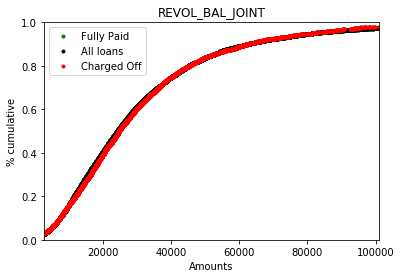

           All loans     Fully Paid    Charged Off
count   23510.000000   18478.000000    5032.000000
mean    31181.272140   31224.293755   31023.292528
std     26484.346638   26965.958231   24637.093790
min         0.000000       0.000000       0.000000
25%     13672.000000   13574.000000   14247.500000
50%     24385.000000   24255.000000   24798.000000
75%     40338.000000   40331.750000   40406.000000
max    290237.000000  290237.000000  266416.000000


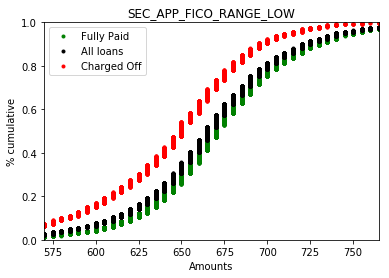

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean     666.704806    672.540318   645.276232
std       45.242020     43.807192    43.956272
min      540.000000    540.000000   540.000000
25%      640.000000    645.000000   620.000000
50%      665.000000    670.000000   650.000000
75%      690.000000    695.000000   675.000000
max      830.000000    830.000000   805.000000


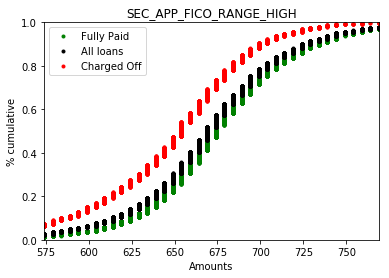

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean     670.704806    676.540318   649.276232
std       45.242020     43.807192    43.956272
min      544.000000    544.000000   544.000000
25%      644.000000    649.000000   624.000000
50%      669.000000    674.000000   654.000000
75%      694.000000    699.000000   679.000000
max      834.000000    834.000000   809.000000


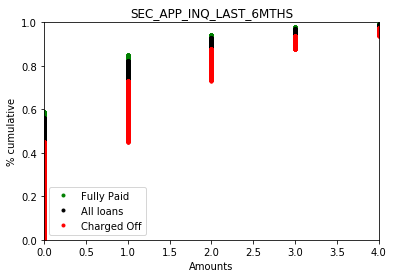

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean       0.735262      0.653859     1.034181
std        1.074143      0.995038     1.281190
min        0.000000      0.000000     0.000000
25%        0.000000      0.000000     0.000000
50%        0.000000      0.000000     1.000000
75%        1.000000      1.000000     2.000000
max        6.000000      6.000000     6.000000


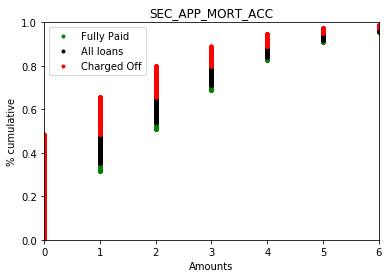

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean       1.713228      1.834506     1.267886
std        1.839451      1.864779     1.669520
min        0.000000      0.000000     0.000000
25%        0.000000      0.000000     0.000000
50%        1.000000      1.000000     1.000000
75%        3.000000      3.000000     2.000000
max       17.000000     17.000000    13.000000


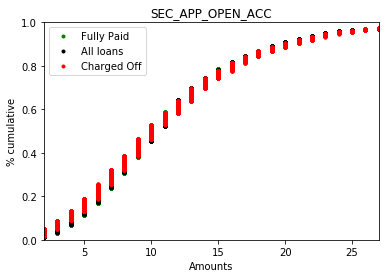

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean      11.307529     11.325360    11.242051
std        6.493083      6.454004     6.634855
min        0.000000      0.000000     0.000000
25%        7.000000      7.000000     6.000000
50%       10.000000     10.000000    10.000000
75%       15.000000     15.000000    15.000000
max       58.000000     58.000000    44.000000


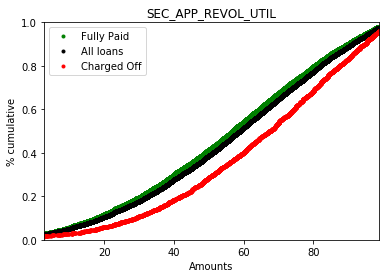

          All loans    Fully Paid  Charged Off
count  23126.000000  18248.000000  4878.000000
mean      56.965761     55.025986    64.222222
std       26.394349     26.369650    25.197906
min        0.000000      0.000000     0.000000
25%       37.800000     35.600000    47.125000
50%       58.900000     56.600000    67.500000
75%       78.200000     76.100000    84.100000
max      163.900000    155.000000   163.900000


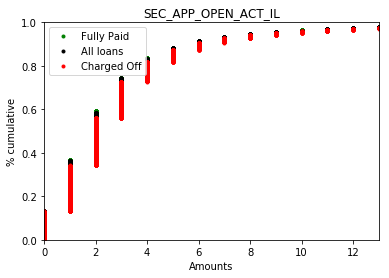

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean       2.916376      2.878775     3.054452
std        3.237409      3.184368     3.421932
min        0.000000      0.000000     0.000000
25%        1.000000      1.000000     1.000000
50%        2.000000      2.000000     2.000000
75%        4.000000      4.000000     4.000000
max       35.000000     35.000000    33.000000


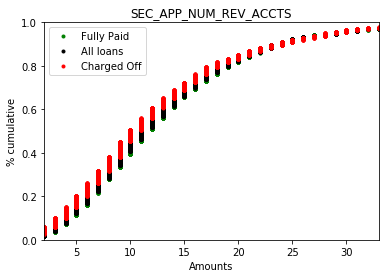

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean      12.848915     13.006386    12.270668
std        8.352366      8.340657     8.370678
min        0.000000      0.000000     0.000000
25%        7.000000      7.000000     6.000000
50%       11.000000     11.000000    10.000000
75%       17.000000     17.000000    16.000000
max       90.000000     90.000000    61.000000


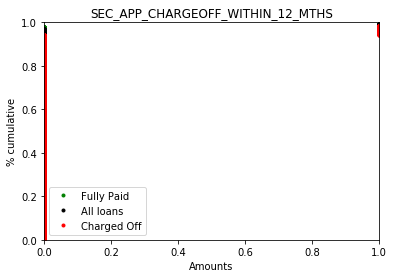

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean       0.049851      0.037666     0.094595
std        0.429345      0.356917     0.625276
min        0.000000      0.000000     0.000000
25%        0.000000      0.000000     0.000000
50%        0.000000      0.000000     0.000000
75%        0.000000      0.000000     0.000000
max       20.000000     14.000000    20.000000


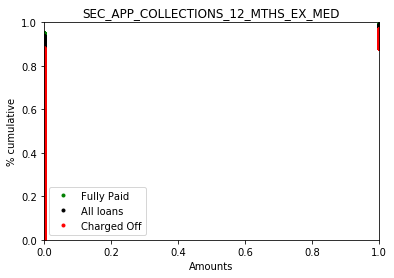

          All loans    Fully Paid  Charged Off
count  23510.000000  18478.000000  5032.000000
mean       0.082178      0.057582     0.172496
std        0.387895      0.293415     0.613612
min        0.000000      0.000000     0.000000
25%        0.000000      0.000000     0.000000
50%        0.000000      0.000000     0.000000
75%        0.000000      0.000000     0.000000
max       11.000000     10.000000    11.000000


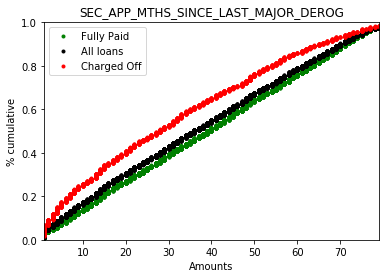

         All loans   Fully Paid  Charged Off
count  8338.000000  6120.000000  2218.000000
mean     37.139842    39.332026    31.091073
std      23.895275    23.671229    23.468821
min       0.000000     0.000000     0.000000
25%      16.000000    18.000000    10.000000
50%      36.000000    39.000000    28.000000
75%      57.000000    59.000000    49.000000
max     125.000000   125.000000   115.000000


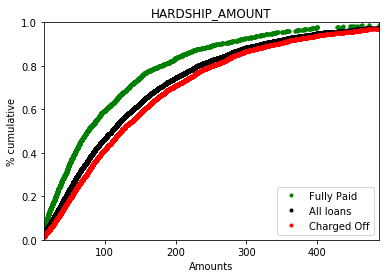

          All loans   Fully Paid  Charged Off
count  10028.000000  2886.000000  7142.000000
mean     147.370377   113.423708   161.087835
std      128.257327   109.327087   132.722824
min        0.640000     0.640000     1.610000
25%       53.470000    37.110000    62.490000
50%      110.005000    75.430000   123.050000
75%      203.350000   151.367500   223.142500
max      943.940000   781.050000   943.940000


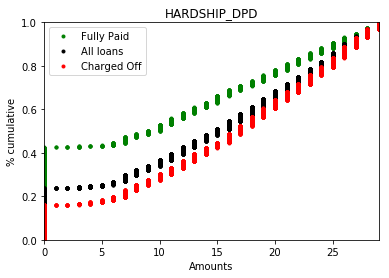

          All loans   Fully Paid  Charged Off
count  10028.000000  2886.000000  7142.000000
mean      13.885919    10.158004    15.392327
std        9.816231    10.180893     9.248765
min        0.000000     0.000000     0.000000
25%        5.000000     0.000000     8.000000
50%       15.000000     9.000000    17.000000
75%       23.000000    19.000000    23.000000
max       37.000000    37.000000    32.000000


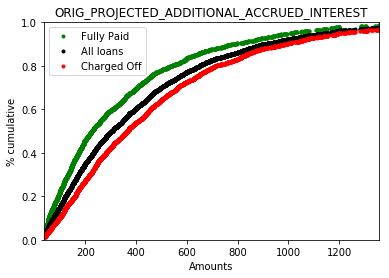

         All loans   Fully Paid  Charged Off
count  6464.000000  2718.000000  3746.000000
mean    413.094124   340.088212   466.065312
std     360.378648   324.602863   375.514912
min       1.920000     1.920000     6.450000
25%     147.892500   111.667500   186.210000
50%     305.775000   226.050000   365.220000
75%     569.587500   457.297500   637.620000
max    2343.150000  2343.150000  2267.280000


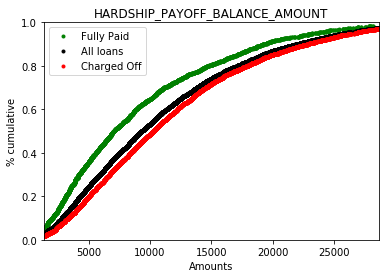

          All loans    Fully Paid   Charged Off
count  10028.000000   2886.000000   7142.000000
mean   10982.148993   9137.133479  11727.698527
std     7430.650925   7065.228355   7445.179915
min       55.730000     55.730000    191.120000
25%     5075.960000   3665.052500   5887.255000
50%     9320.405000   7047.270000  10268.590000
75%    15284.330000  12907.110000  15971.587500
max    39542.450000  39542.450000  38399.000000


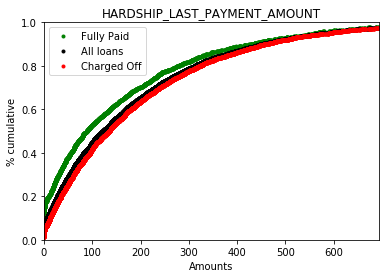

          All loans   Fully Paid  Charged Off
count  10028.000000  2886.000000  7142.000000
mean     184.276039   159.735835   194.192453
std      195.456440   190.567957   196.543184
min        0.010000     0.010000     0.010000
25%       39.360000    20.302500    48.935000
50%      121.960000    89.170000   135.320000
75%      267.080000   233.952500   279.615000
max     1407.860000  1247.480000  1407.860000


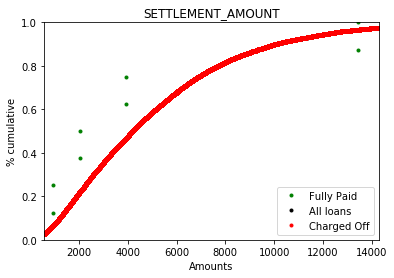

          All loans    Fully Paid   Charged Off
count  61484.000000      8.000000  61476.000000
mean    5045.485081   5091.385000   5045.479108
std     3662.768623   5287.072766   3662.572405
min       44.210000    926.000000     44.210000
25%     2250.970000   1775.750000   2251.000000
50%     4203.230000   2992.770000   4203.675000
75%     6906.000000   6308.405000   6906.000000
max    33601.000000  13454.000000  33601.000000


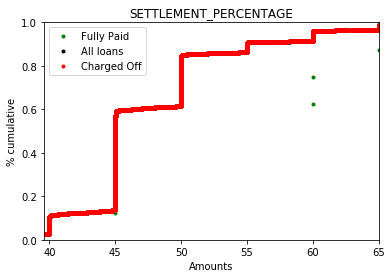

          All loans  Fully Paid   Charged Off
count  61484.000000    8.000000  61476.000000
mean      47.600147   53.750000     47.599346
std        7.321847    9.543135      7.321279
min        0.200000   45.000000      0.200000
25%       45.000000   45.000000     45.000000
50%       45.000000   52.500000     45.000000
75%       50.000000   61.250000     50.000000
max      521.350000   65.000000    521.350000


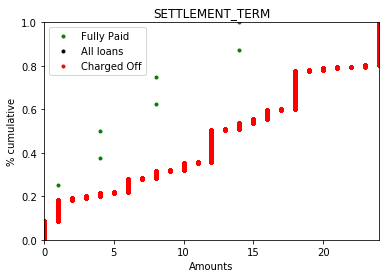

          All loans  Fully Paid   Charged Off
count  61484.000000    8.000000  61476.000000
mean      12.972741    6.750000     12.973551
std        8.321026    5.203021      8.321079
min        0.000000    1.000000      0.000000
25%        6.000000    3.250000      6.000000
50%       12.000000    6.000000     12.000000
75%       18.000000    9.500000     18.000000
max      181.000000   14.000000    181.000000


In [9]:
for thing in numeric:
    numeric_graph(thing)